In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

In [ ]:
# import dataset

df = pd.read_csv('..//content/mobil_listrik.csv')
df.head()

,id_komentar,nama_akun,tanggal,text_cleaning,sentimen
0,Ugzbll5eyrIy3-gdUUJ4AaABAg,Sqn Ldr,2023-08-06 12:54:49+00:00,saran sih bikin harga ionic sama kayak brio ...,positif
1,UgzEDUiV3OTrV943p8p4AaABAg,lushen ace,2023-08-04 12:16:23+00:00,problem subsidi kualitas diturunin harga dinai...,negatif
2,UgwqJqu6JMF4EH2CsVV4AaABAg,Fatih Al-Ayyubi,2023-08-04 10:17:57+00:00,baik kualitas kembang dulu baik kualitas motor...,positif
3,UgyYicCMR1rKwuOj2Y14AaABAg,yp office,2023-08-04 08:29:54+00:00,model jelek kwalitas buruk harga mahal croot,negatif
4,UgxKAcLuAwZOQK6es-x4AaABAg,Lembur Kuring,2023-08-04 07:55:37+00:00,syarat ngaco woy anak muda blom punya ruma...,negatif


In [ ]:
col = ['text_cleaning', 'sentimen']
df = df[col]

df.isnull().sum()

text_cleaning    2
sentimen         0
dtype: int64

In [ ]:
df = df.dropna()

df.isnull().sum()

text_cleaning    0
sentimen         0
dtype: int64

In [ ]:
df.columns = ['text', 'sentimen']
df['sentimen_id'] = df['sentimen'].factorize()[0]

df.head()

,text,sentimen,sentimen_id
0,saran sih bikin harga ionic sama kayak brio ...,positif,0
1,problem subsidi kualitas diturunin harga dinai...,negatif,1
2,baik kualitas kembang dulu baik kualitas motor...,positif,0
3,model jelek kwalitas buruk harga mahal croot,negatif,1
4,syarat ngaco woy anak muda blom punya ruma...,negatif,1


In [ ]:
encoded_data, mapping_index = df['sentimen'].factorize()
print(encoded_data)
print(mapping_index)

[0 1 0 ... 0 2 1]
Index(['positif', 'negatif', 'netral'], dtype='object')


<Axes: xlabel='sentimen'>

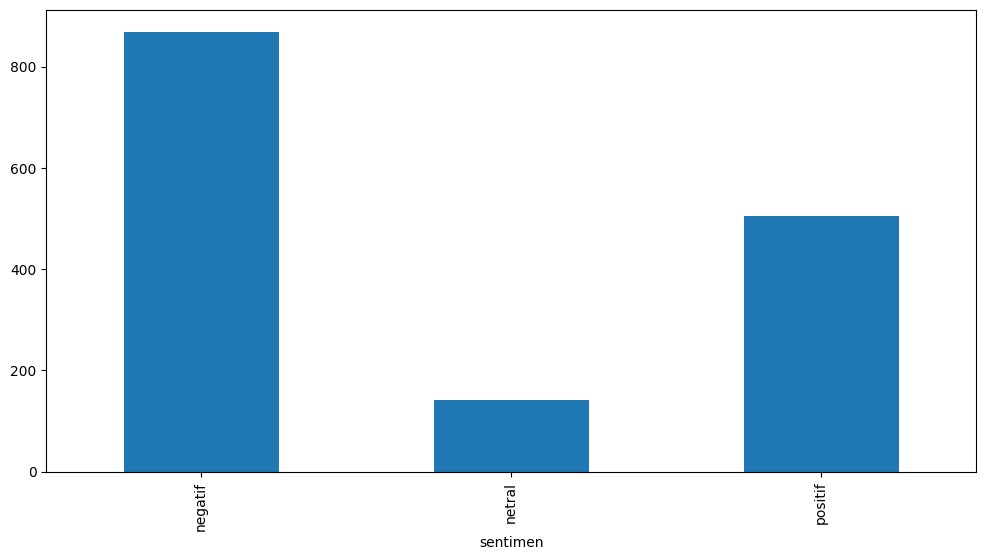

In [ ]:
fig = plt.figure(figsize=(12,6))
df.groupby('sentimen').text.count().plot.bar()

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(
    sublinear_tf=True,
    min_df=5,
    norm='l2',
    encoding='latin-1',
    ngram_range=(1,2),
    stop_words='english'
)

features = tfidf.fit_transform(df.text).toarray()
labels = df.sentimen_id

features.shape

(1515, 977)

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer

from sklearn.naive_bayes import MultinomialNB

X_train, X_test, y_train, y_test = train_test_split(
    df['text'],
    df['sentimen_id'],
    random_state=0
)

count_vect = CountVectorizer()
X_train_counts = count_vect.fit_transform(X_train)

tfidf_transformer = TfidfTransformer()
X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts)

clf = MultinomialNB().fit(X_train_tfidf, y_train)

In [ ]:
sample1 = df.sample(1)
print(sample1.sentimen)
print(df.text[sample1.index[0]])

111    positif
Name: sentimen, dtype: object
mungkin dg serentak perintah guna kendara spy masyarakat contoh


In [ ]:
pred = clf.predict(count_vect.transform([df.text[sample1.index[0]]]))
print(mapping_index[pred][0])

negatif


In [ ]:
sample2 = df.sample(1)
print(sample2.sentimen)
print(df.text[sample2.index[0]])

148    negatif
Name: sentimen, dtype: object
mau murah   dipake mudik buat apa sampe taun kuda   bakal ngalahin lcgc bensin     kasi solusi dulu


In [ ]:
pred = clf.predict(count_vect.transform([df.text[sample2.index[0]]]))
print(mapping_index[pred][0])

negatif


In [ ]:
pred = clf.predict(count_vect.transform([df.text[1500]]))

print(mapping_index[pred][0])

negatif


MODEL

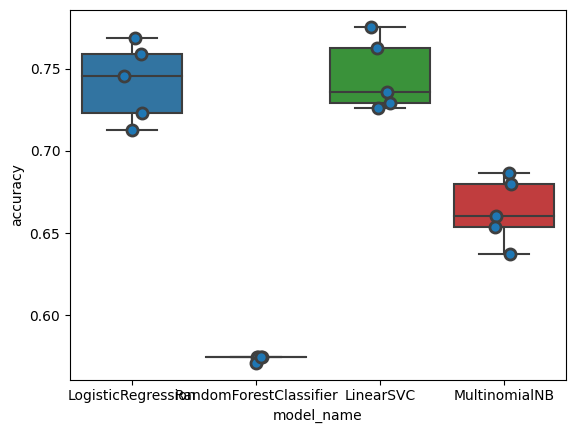

In [ ]:
# find the best model

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC

from sklearn.model_selection import cross_val_score

models = [
    LogisticRegression(random_state=0),
    RandomForestClassifier(n_estimators=200,max_depth=3,random_state=0),
    LinearSVC(),
    MultinomialNB()
]

CV = 5
cv_df = pd.DataFrame(index=range(CV * len(models)))

entries = []
for model in models:
    model_name = model.__class__.__name__
    accuracies = cross_val_score(model, features, labels, scoring='accuracy', cv=CV)

    for fold_idx, accuracy in enumerate(accuracies):
        entries.append((model_name, fold_idx, accuracy))

cv_df = pd.DataFrame(entries, columns=['model_name', 'fold_idx', 'accuracy'])

import seaborn as sns

sns.boxplot(x='model_name', y='accuracy', data=cv_df)
sns.stripplot(x='model_name', y='accuracy', data=cv_df,
              size=8, jitter=True, edgecolor="gray", linewidth=2)
plt.show()

In [ ]:
cv_df.groupby('model_name').accuracy.mean()

model_name
LinearSVC                 0.745875
LogisticRegression        0.741914
MultinomialNB             0.663366
RandomForestClassifier    0.573597
Name: accuracy, dtype: float64

In [ ]:
# df['sentimen_id'] = df['sentimen'].factorize()[0]
sentimen_id_df = df[['sentimen', 'sentimen_id']].drop_duplicates().sort_values('sentimen_id')
sentimen_to_id = dict(sentimen_id_df.values)
id_to_sentimen = dict(sentimen_id_df[['sentimen_id', 'sentimen']].values)
df.head()

,text,sentimen,sentimen_id
0,saran sih bikin harga ionic sama kayak brio ...,positif,0
1,problem subsidi kualitas diturunin harga dinai...,negatif,1
2,baik kualitas kembang dulu baik kualitas motor...,positif,0
3,model jelek kwalitas buruk harga mahal croot,negatif,1
4,syarat ngaco woy anak muda blom punya ruma...,negatif,1


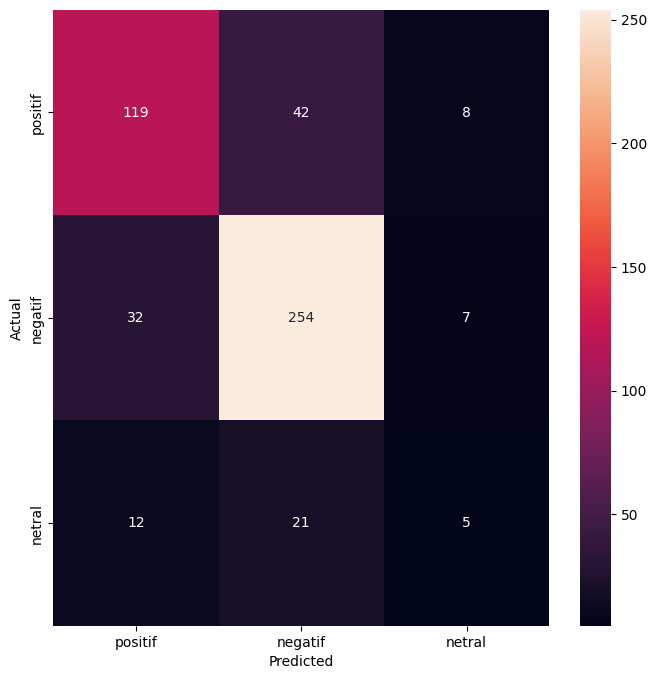

In [ ]:
from sklearn.svm import LinearSVC
import seaborn as sns

model = LinearSVC()
X_train, X_test, y_train, y_test, indices_train, indices_test = train_test_split(features, labels, df.index, test_size=0.33, random_state=0)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

from sklearn.metrics import confusion_matrix

conf_mat = confusion_matrix(y_test, y_pred)
fig, ax = plt.subplots(figsize=(8,8))
sns.heatmap(conf_mat, annot=True, fmt='d',
            xticklabels=sentimen_id_df.sentimen.values, yticklabels=sentimen_id_df.sentimen.values)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

In [ ]:
from sklearn import metrics

print(metrics.classification_report(y_test, y_pred, target_names=df['sentimen'].unique()))

              precision    recall  f1-score   support

     positif       0.73      0.70      0.72       169
     negatif       0.80      0.87      0.83       293
      netral       0.25      0.13      0.17        38

    accuracy                           0.76       500
   macro avg       0.59      0.57      0.57       500
weighted avg       0.74      0.76      0.74       500

